In [ ]:
#Importing the required packages
import json_lines
import jsonlines
import os, json
import pandas as pd
import re
import nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer

In [ ]:
path_to_json = 'E:\data'
json_files = [pos_json for pos_json in os.listdir(path_to_json) if pos_json.endswith('.jsonl')]
#print(json_files[9:33])  # for me this prints ['foo.json']

In [ ]:
dfs=[]

In [ ]:
##Extracting the Twitter Data from JSON Files
for f in json_files[0:8]:
    fname= "E:\\Data\\"+ f
    jsonObj = pd.read_json(fname,lines = True)
    dfs.append(jsonObj)
    print(f)
    print("\n")

In [56]:
## Concatenating the twitter data into a dataframe
temp = pd.concat(dfs, ignore_index=True)
#temp.count()

In [57]:
df=temp.copy()

In [58]:
#cleaning the data to perfrom the Analysis
df['cleaned_tweet'] = df['text'].replace("  ", " ")

df['cleaned_tweet'] = df['cleaned_tweet'].replace(r'^(@\w+)',"", regex=True) 

#remove retweets

df['cleaned_tweet'] = df['cleaned_tweet'].replace(r'^(RT @)',"", regex=True)

df['cleaned_tweet'] = df['cleaned_tweet'].replace(r'https.*$', "", regex = True)

df['cleaned_tweet'] = df['cleaned_tweet'].replace(r'amp',"", regex = True)

df['cleaned_tweet'] = df['cleaned_tweet'].replace(r'https',"", regex = True)

df['cleaned_tweet'] = df['cleaned_tweet'].replace(r'^\s+|\s+$'," ", regex=True)

In [60]:
#considering only english language tweets
df = df.loc[df['lang'] == 'en']
df['cleaned_tweet'].str.lower() #
#Filtering the Tweets that are realted to Work from home
df2 = df[df['cleaned_tweet'].str.contains("work from home | remote work | virtual work | WFH")]

In [61]:
#Performing the Sentiment analysis
from nltk.sentiment.vader import SentimentIntensityAnalyzer

sid = SentimentIntensityAnalyzer()
df2['scores'] = df2['cleaned_tweet'].apply(lambda Description: sid.polarity_scores(Description))

C:\Users\vamse\AppData\Local\Temp/ipykernel_17388/2371643888.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['scores'] = df2['cleaned_tweet'].apply(lambda Description: sid.polarity_scores(Description))


In [62]:
df2['compound'] = df2['scores'].apply(lambda score_dict: score_dict['compound'])


df2.loc[df2.compound>0,'sentiment']='Positive'

df2.loc[df2.compound==0,'sentiment']='Neutral'

df2.loc[df2.compound<0,'sentiment']='Negative'

df2.head()

C:\Users\vamse\AppData\Local\Temp/ipykernel_17388/2208200303.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['compound'] = df2['scores'].apply(lambda score_dict: score_dict['compound'])
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:1684: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = infer_fill_value(value)
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataF

,created_at,id,id_str,text,source,truncated,in_reply_to_status_id,in_reply_to_status_id_str,in_reply_to_user_id,in_reply_to_user_id_str,...,quoted_status,quoted_status_permalink,display_text_range,extended_entities,withheld_in_countries,scopes,cleaned_tweet,scores,compound,sentiment
1450,2020-05-28 15:35:04+00:00,1266030236069748736,1266030236069748736,RT @AnnaESanders: .@NYCHealthSystem's flub mea...,"<a href=""https://about.twitter.com/products/tw...",False,NaN,NaN,NaN,NaN,...,{'created_at': 'Thu May 28 15:29:52 +0000 2020...,"{'url': 'https://t.co/x2RCxX4y9i', 'expanded':...",NaN,NaN,NaN,NaN,AnnaESanders: .@NYCHealthSystem's flub meant c...,"{'neg': 0.13, 'neu': 0.87, 'pos': 0.0, 'compou...",-0.4588,Negative
1955,2020-05-28 15:35:14+00:00,1266030278134435841,1266030278134435840,RT @Fern_Europe: Irish Taoiseach Leo Varadkar ...,"<a href=""http://twitter.com/download/android"" ...",False,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,Fern_Europe: Irish Taoiseach Leo Varadkar has ...,"{'neg': 0.0, 'neu': 0.864, 'pos': 0.136, 'comp...",0.5106,Positive
2595,2020-05-28 15:35:28+00:00,1266030335520882688,1266030335520882688,I want to work from home forever 😂,"<a href=""http://twitter.com/download/iphone"" r...",False,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,I want to work from home forever 😂,"{'neg': 0.0, 'neu': 0.794, 'pos': 0.206, 'comp...",0.0772,Positive
3321,2020-05-28 15:35:44+00:00,1266030402797518849,1266030402797518848,RT @HowardEdTech: Kindergarten and work from h...,"<a href=""http://twitter.com/download/iphone"" r...",False,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,HowardEdTech: Kindergarten and work from home ...,"{'neg': 0.067, 'neu': 0.933, 'pos': 0.0, 'comp...",-0.1655,Negative
4186,2020-05-28 15:36:03+00:00,1266030482199805953,1266030482199805952,Only 12% of workers want to work from home ful...,"<a href=""https://mobile.twitter.com"" rel=""nofo...",False,NaN,NaN,NaN,NaN,...,NaN,NaN,"[0, 96]","{'media': [{'id': 1266030476168396804, 'id_str...",NaN,NaN,Only 12% of workers want to work from home ful...,"{'neg': 0.0, 'neu': 0.894, 'pos': 0.106, 'comp...",0.0772,Positive


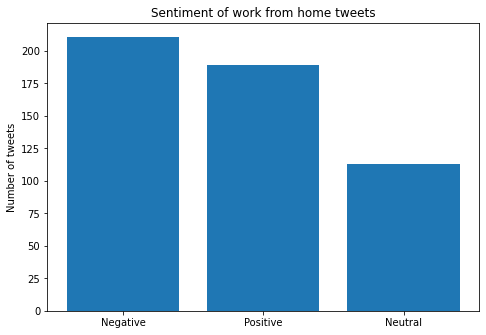

In [63]:
#Plotting the result
import matplotlib.pyplot as plt
fig = plt.figure()
x = ['Negative','Positive','Neutral']
ax = fig.add_axes([0,0,1,1])
ax.set_ylabel('Number of tweets')
ax.set_title('Sentiment of work from home tweets')
ax.bar(x,df2['sentiment'].value_counts())
plt.show()